# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities


In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library


In [105]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [106]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date,
            }
        )

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | springbok
Processing Record 2 of Set 1 | nueva esperanza
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | mulchen
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | minas de marcona
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | shingu
Processing Record 10 of Set 1 | tazacorte
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | jumla
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | kudahuvadhoo
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | usinsk
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | 

In [107]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [108]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,springbok,-29.6643,17.8865,15.64,71,7,2.30,ZA,1707334311
1,nueva esperanza,15.2667,-87.6000,24.79,50,48,1.83,HN,1707334311
2,bilibino,68.0546,166.4372,-35.41,100,99,0.40,RU,1707334311
3,blackmans bay,-43.0167,147.3167,15.07,75,100,0.27,AU,1707334312
4,mulchen,-37.7167,-72.2333,28.92,22,89,3.56,CL,1707334312


In [109]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [110]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,springbok,-29.6643,17.8865,15.64,71,7,2.30,ZA,1707334311
1,nueva esperanza,15.2667,-87.6000,24.79,50,48,1.83,HN,1707334311
2,bilibino,68.0546,166.4372,-35.41,100,99,0.40,RU,1707334311
3,blackmans bay,-43.0167,147.3167,15.07,75,100,0.27,AU,1707334312
4,mulchen,-37.7167,-72.2333,28.92,22,89,3.56,CL,1707334312


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature


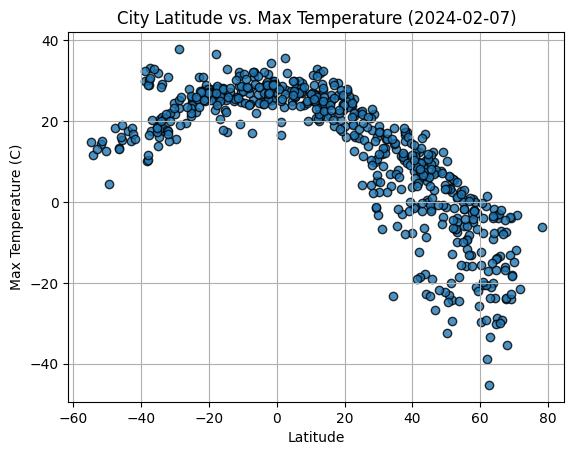

In [111]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    marker="o",
    edgecolors="black",
    alpha=0.8,
    linewidths=1,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity


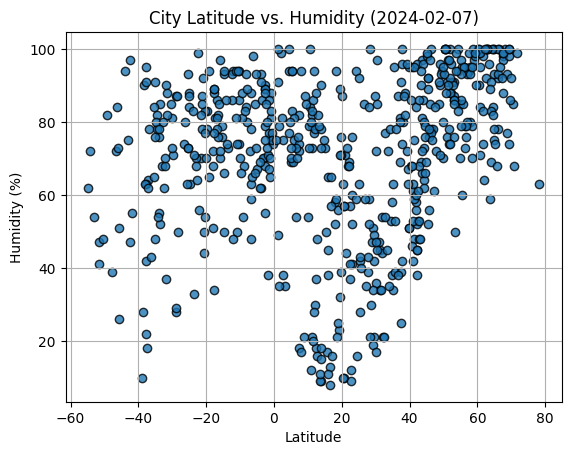

In [112]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    marker="o",
    edgecolors="black",
    alpha=0.8,
    linewidths=1,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness


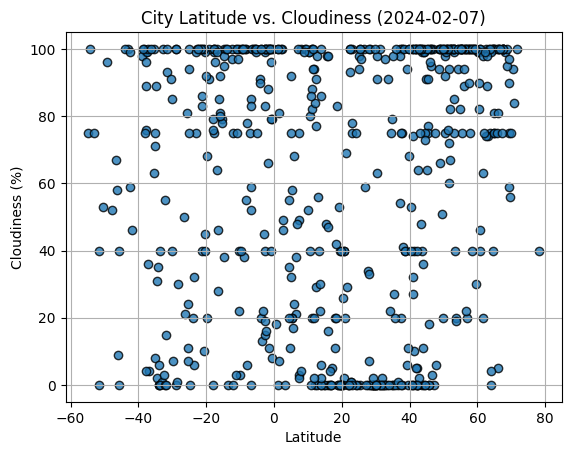

In [113]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    marker="o",
    edgecolors="black",
    alpha=0.8,
    linewidths=1,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot


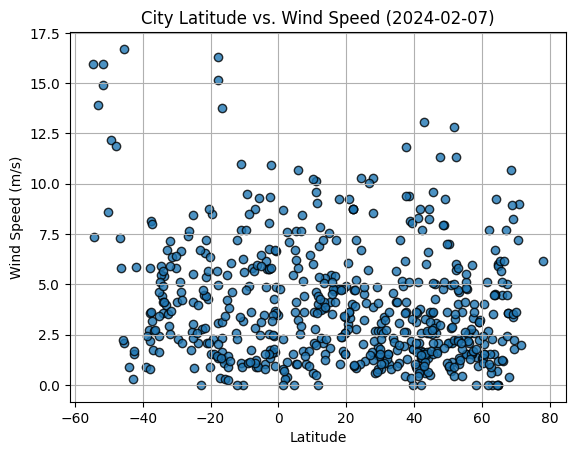

In [114]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    marker="o",
    edgecolors="black",
    alpha=0.8,
    linewidths=1,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [115]:
# Define a function to create Linear Regression plots
def create_linregress(x_values, y_values, x_label, y_label, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x, y), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [116]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nueva esperanza,15.2667,-87.6000,24.79,50,48,1.83,HN,1707334311
2,bilibino,68.0546,166.4372,-35.41,100,99,0.40,RU,1707334311
5,stanley,54.8680,-1.6985,0.85,85,82,2.35,GB,1707334124
7,albany,42.6001,-73.9662,6.16,53,64,0.89,US,1707334202
8,shingu,33.7333,135.9833,3.92,72,91,2.31,JP,1707334312


In [117]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,springbok,-29.6643,17.8865,15.64,71,7,2.30,ZA,1707334311
3,blackmans bay,-43.0167,147.3167,15.07,75,100,0.27,AU,1707334312
4,mulchen,-37.7167,-72.2333,28.92,22,89,3.56,CL,1707334312
6,minas de marcona,-15.2119,-75.1103,22.87,76,79,5.45,PE,1707334312
12,port-aux-francais,-49.3500,70.2167,4.49,82,96,12.17,TF,1707334312


### Temperature vs. Latitude Linear Regression Plot


The r-squared is: 0.7312196564825982


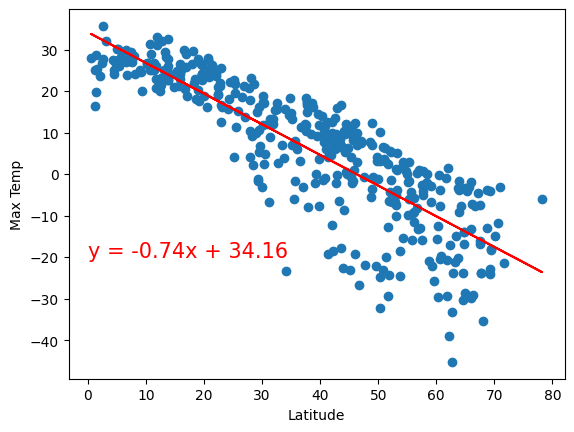

In [118]:
# Linear regression on Northern Hemisphere
create_linregress(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    0,
    -20,
)

The r-squared is: 0.38049405014938764


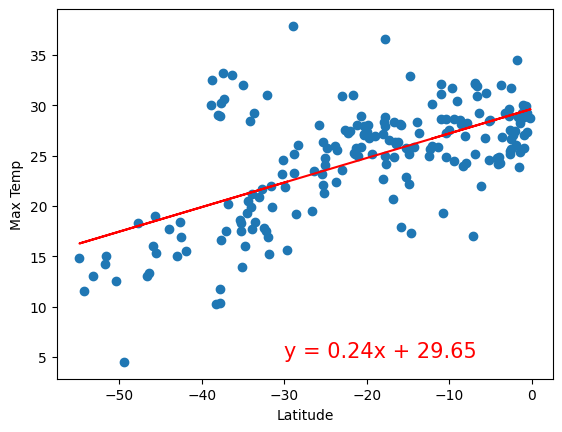

In [119]:
# Linear regression on Southern Hemisphere
create_linregress(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    -30,
    5,
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE


### There is a strong relationship between Latitude and Max Temp

*Northern Hemisphere*
- Negative correlation

*Southern Hemisphere*
- Positive correlation

**Max Temp increases as we get closer to the equator**

### Humidity vs. Latitude Linear Regression Plot


The r-squared is: 0.2209709365068311


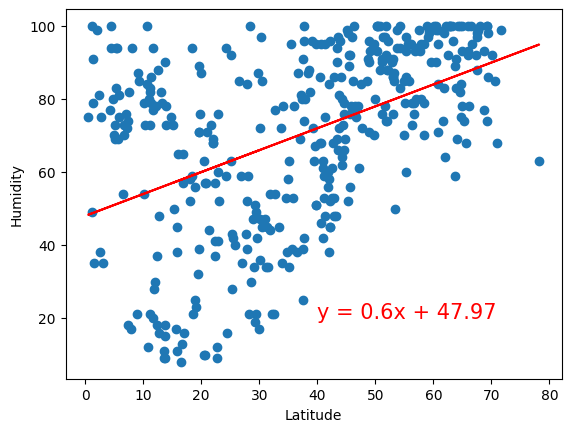

In [120]:
# Northern Hemisphere
create_linregress(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    40,
    20,
)

The r-squared is: 0.09104761037523683


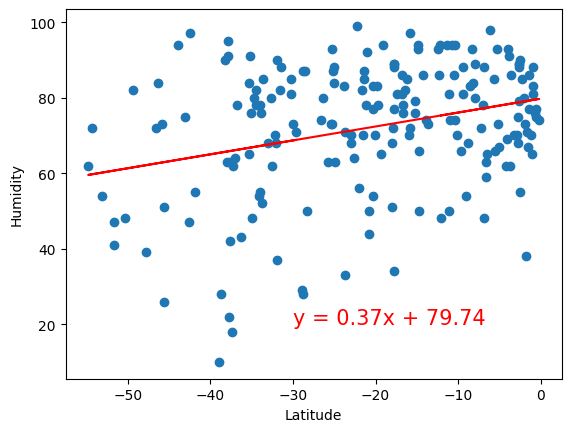

In [121]:
# Southern Hemisphere
create_linregress(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    -30,
    20,
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE


### There is little to no relationship between Latitude and Humidity

*Northern Hemisphere*
- Slight positive correlation

*Southern Hemisphere*
- Slight positive correlation

**Distance from the equator has little to no affect on Humidity and scatter plots are too spread for there to be a reliable correlation**

### Cloudiness vs. Latitude Linear Regression Plot


The r-squared is: 0.13896802147789153


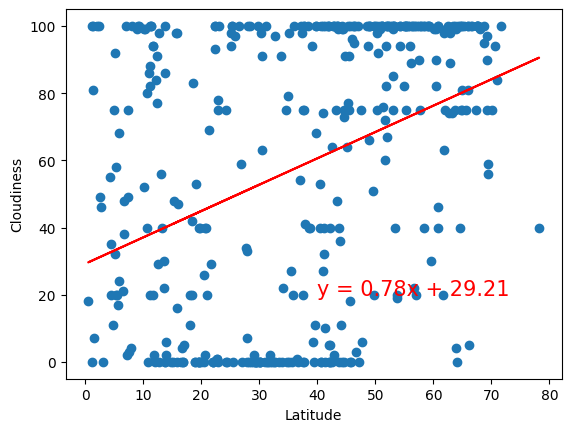

In [122]:
# Northern Hemisphere
create_linregress(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    40,
    20,
)

The r-squared is: 0.029763382482533705


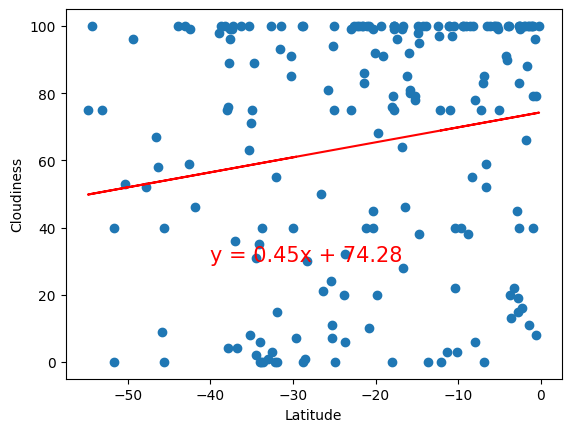

In [123]:
# Southern Hemisphere
create_linregress(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    -40,
    30,
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE


### There is no relationship between Latitude and Cloudiness

*Northern Hemisphere*
- Positive correlation

*Southern Hemisphere*
- Positive correlation

**Distance from the equator has little to no affect on cloudiness and scatter plots are too spread for there to be a reliable correlation**

### Wind Speed vs. Latitude Linear Regression Plot


The r-squared is: 0.006830322276004712


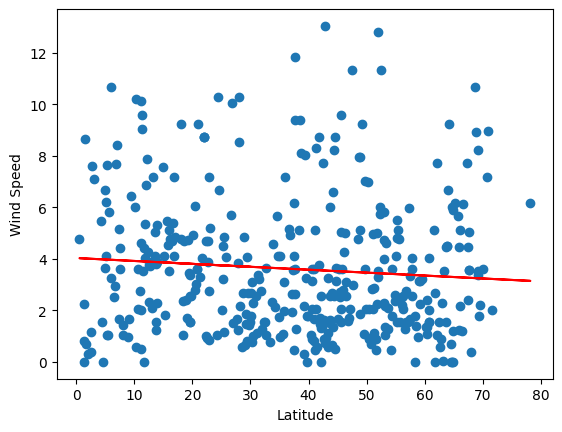

In [124]:
# Northern Hemisphere
create_linregress(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    12,
    15,
)

The r-squared is: 0.055445059124530134


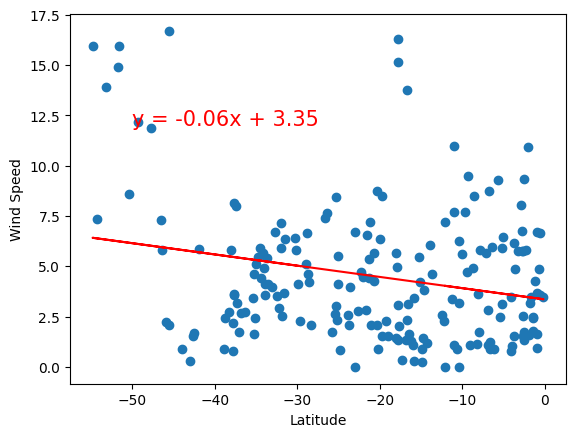

In [125]:
# Southern Hemisphere
create_linregress(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    -50,
    12,
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE


### There no relationship between Latitude and Wind Speed

*Northern Hemisphere*
- Slight negative correlation

*Southern Hemisphere*
- Slight negative correlation

**r-values are too low and scatter plots are too spread for there to be a reliable correlation**